In [4]:
import numpy as np
from apposto.types.guide_source import GuideSource
from apposto.types.aperture import CircularOpticalAperture
from apposto.atmo.von_karmann_covariance_calculator import VonKarmannSpatioTemporalCovariance

source1 = GuideSource((0, 0), np.inf)
source2 = GuideSource((50, 30), 100e3)
aperture1 = CircularOpticalAperture(5, [0, 0, 0])
aperture2 = CircularOpticalAperture(5, [0, 0, 0])
r0 = np.array([0.16])
L0 = 25
layer_alt = np.array([10e3])
temp_freqs = np.linspace(0.05, 250, 5000)
spat_freqs = np.logspace(-3, 3, 100)

vk = VonKarmannSpatioTemporalCovariance(source1=source1, source2=source2, aperture1=aperture1, aperture2=aperture2,
                                        spat_freqs=spat_freqs, r0=r0, L0=L0, layer_altitude=layer_alt)
    
intFunc, _ = vk._computePhaseCPSD(nLayer=0, temp_freq=temp_freqs[500], wind=10, th_wind=-20)

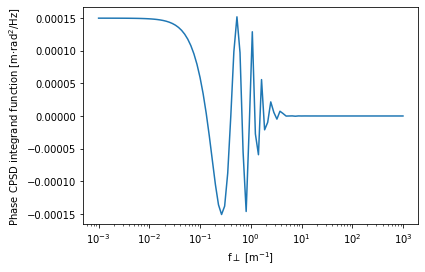

In [5]:
import matplotlib.pyplot as plt

plt.semilogx(spat_freqs, np.real(intFunc))
plt.xlabel('f${\perp}$ [m$^{-1}$]')
plt.ylabel('Phase CPSD integrand function [m$\cdot$rad$^{2}$/Hz]')
plt.show()